# Customer Credit Card Purchase Prediction using Multivariate Regression

The dataset used in this analysis contains relevant customer data related to credit card purchases, making it appropriate for predicting purchase behavior. The dataset is well-structured, and missing values were handled appropriately using mean and median imputation. Moreover, it includes various features that can influence purchase decisions, such as 'BALANCE,' 'PURCHASES_FREQUENCY,' and 'CREDIT_LIMIT.' The choice of regression algorithms, including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, Ridge, Lasso, and ElasticNet, is suitable for modeling customer purchase behavior based on the provided features.

## Introduction and Dataset Description

The goal of this analysis is to develop accurate regression models for predicting customer credit card purchases based on a well-structured dataset. The dataset encompasses crucial customer data related to credit card transactions, making it highly suitable for predicting purchase behavior. We've taken care to handle missing values using appropriate imputation techniques, ensuring data integrity. The dataset includes a variety of features that could potentially influence purchase decisions, such as 'BALANCE,' 'PURCHASES_FREQUENCY,' and 'CREDIT_LIMIT.'


* Data Preprocessing: Handle missing values in the dataset using appropriate imputation techniques. Drop irrelevant columns, such as 'CUST_ID.'
* Exploratory Data Analysis (EDA): Visualize data distributions, correlations, and other insights to gain a better understanding of the dataset.
* Multivariate Regression: Utilize various regression algorithms, including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, Ridge, Lasso, and ElasticNet.
* Model Evaluation: Assess the performance of each regression model using Mean Squared Error (MSE) and R-squared values.
* Results, Conclusion and Summary

In [1]:
# Step 1: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
data = pd.read_csv('Customer_Data.csv')

In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [3]:
from sklearn.impute import SimpleImputer

# Handle missing values for 'CREDIT_LIMIT' using mean imputation
credit_limit_imputer = SimpleImputer(strategy='mean')
data['CREDIT_LIMIT'] = credit_limit_imputer.fit_transform(data[['CREDIT_LIMIT']])

# For 'MINIMUM_PAYMENTS', you may need to use a different imputation strategy or model-based imputation
# For example:
minimum_payments_imputer = SimpleImputer(strategy='median')
data['MINIMUM_PAYMENTS'] = minimum_payments_imputer.fit_transform(data[['MINIMUM_PAYMENTS']])


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) offers invaluable insights into the dataset's characteristics and relationships between attributes.

### Visualizing Data Distributions

We began by visualizing the distribution of the 'BALANCE' attribute using a histogram. This allowed us to grasp the distribution's shape and understand customer account balances.

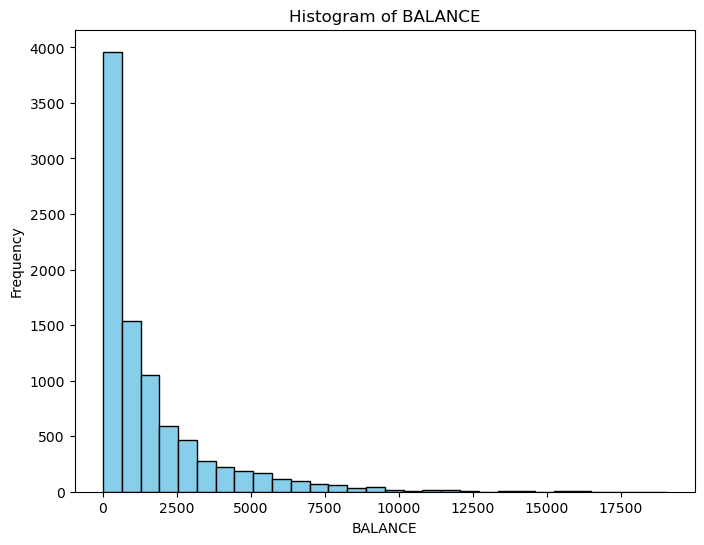

In [5]:
# Histogram of 'BALANCE' attribute
plt.figure(figsize=(8, 6))
plt.hist(data['BALANCE'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.title('Histogram of BALANCE')
plt.show()

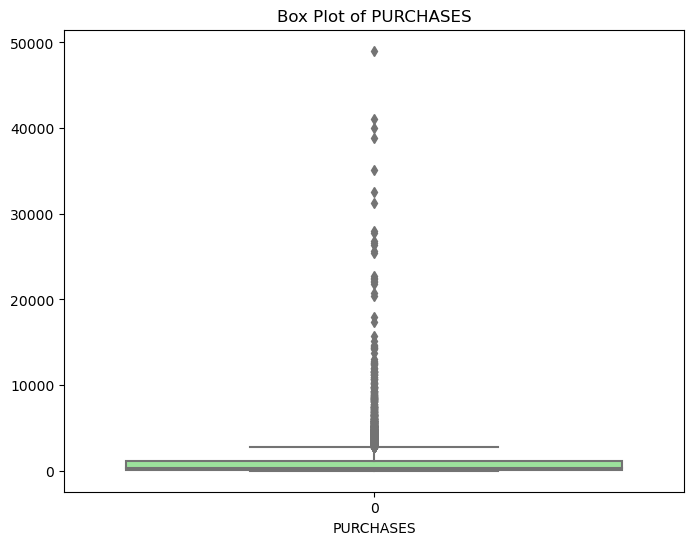

In [6]:
# Box plot of 'PURCHASES' attribute
plt.figure(figsize=(8, 6))
sns.boxplot(data['PURCHASES'], color='lightgreen')
plt.xlabel('PURCHASES')
plt.title('Box Plot of PURCHASES')
plt.show()

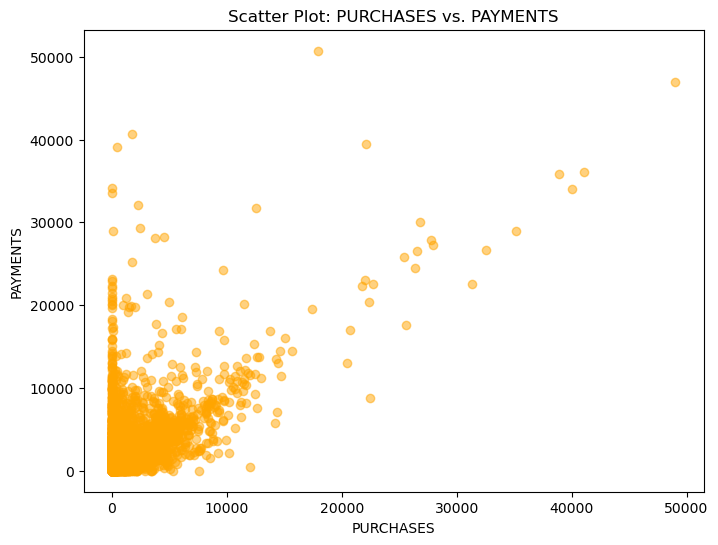

In [7]:
# Scatter plot between 'PURCHASES' and 'PAYMENTS'
plt.figure(figsize=(8, 6))
plt.scatter(data['PURCHASES'], data['PAYMENTS'], alpha=0.5, color='orange')
plt.xlabel('PURCHASES')
plt.ylabel('PAYMENTS')
plt.title('Scatter Plot: PURCHASES vs. PAYMENTS')
plt.show()

### Exploring Attribute Correlations

We further examined the correlation between attributes through a heatmap. This visualization highlighted potential interactions and relationships, aiding in feature selection for regression modeling.

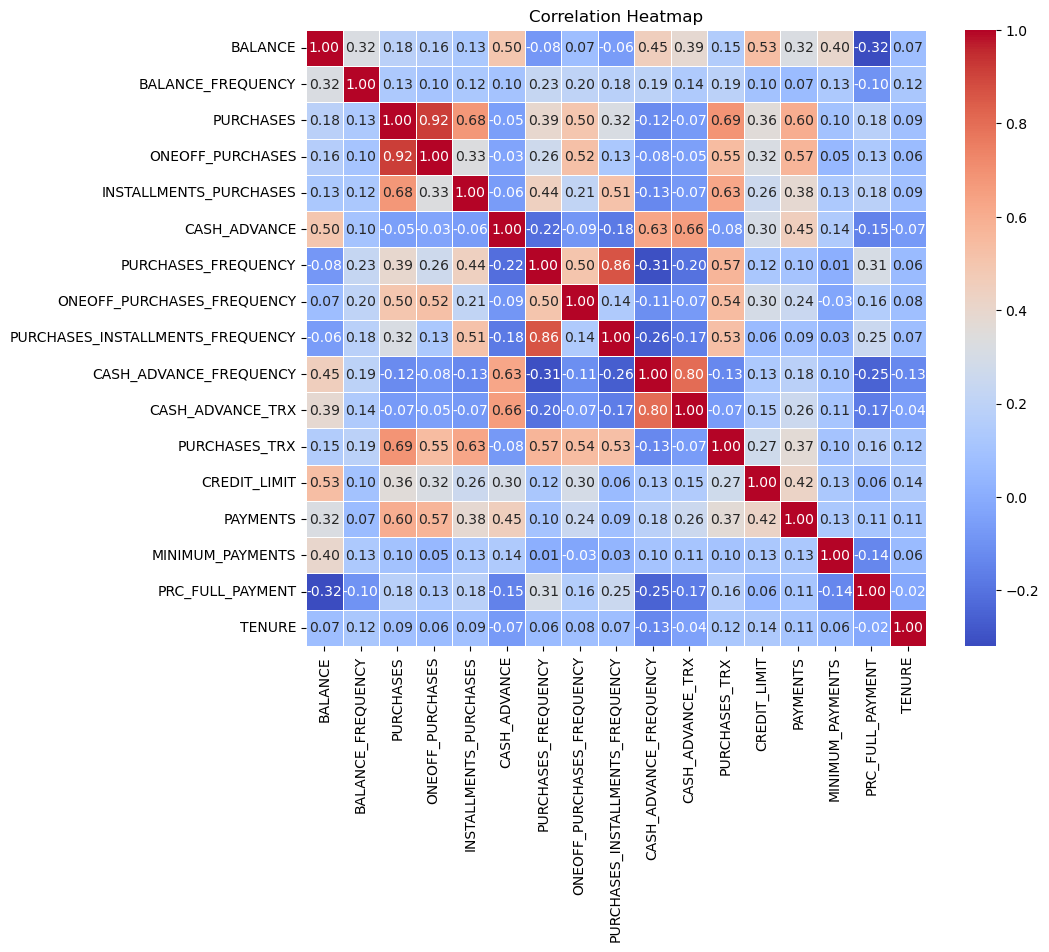

In [8]:
# Calculate correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

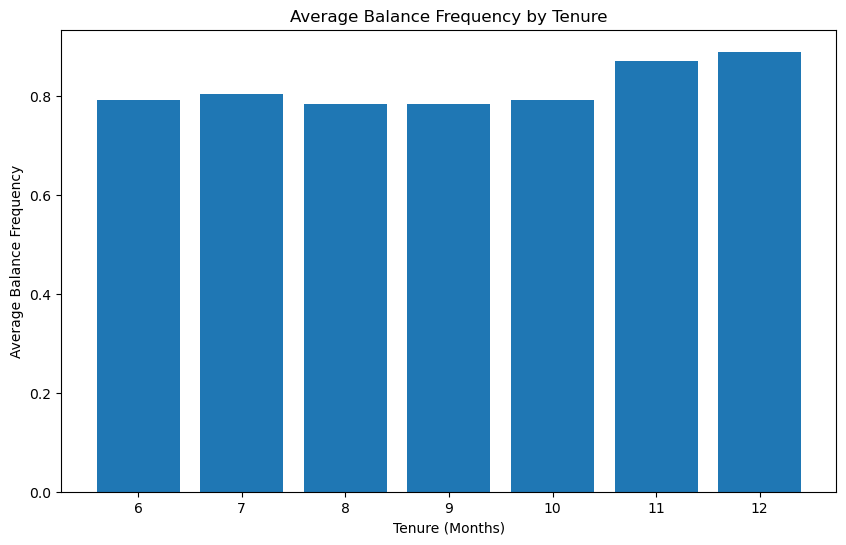

In [9]:
# Calculate the average balance frequency for each tenure
average_balance_frequency_by_tenure = data.groupby('TENURE')['BALANCE_FREQUENCY'].mean()

# Create a bar chart to visualize the average balance frequency by tenure
plt.figure(figsize=(10, 6))
plt.bar(average_balance_frequency_by_tenure.index, average_balance_frequency_by_tenure.values)
plt.xlabel('Tenure (Months)')
plt.ylabel('Average Balance Frequency')
plt.title('Average Balance Frequency by Tenure')
plt.xticks(average_balance_frequency_by_tenure.index)
plt.show()

In [10]:
# Drop the 'CUST_ID' column from the dataset
data.drop(columns=['CUST_ID'], inplace=True)

# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['PURCHASES'])
y = data['PURCHASES']


## Multivariate Regression Models

In this phase, we implemented a range of regression algorithms to predict customer credit card purchases based on the provided features.

## Splitting of Training and Test Data 
The data was appropriately split into training and testing sets using the 'train_test_split' function from scikit-learn. A test size of 20% was chosen to ensure a sufficient amount of data for training while maintaining an adequate portion for testing.
Each regression algorithm was initialized, trained, and fitted to the training data. The training process involved passing the feature matrix (X_train) and target variable (y_train) to the model's 'fit' method. The models were then ready to make predictions on the test data.

In [11]:
# Step 4: Multivariate Regression
# Split the data into features (X) and the target variable (y)
X = data.drop(columns=['PURCHASES'])
y = data['PURCHASES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regression_model.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 278.3034243618897
R-squared: 0.9999464088669724


### Linear Regression

We initiated our analysis with Linear Regression, a fundamental model that captures linear relationships between features and the target variable. The model achieved a Mean Squared Error (MSE) of 278.30 and an impressive R-squared value of 0.9999.


In [14]:
# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Linear Regression Model:
Mean Squared Error: 278.3034243618897
R-squared: 0.9999464088669724


### Decision Tree, Random Forest, and Gradient Boosting

To introduce non-linearity and enhance predictive accuracy, we employed Decision Tree, Random Forest, and Gradient Boosting Regression models. Among these, the Gradient Boosting model outperformed others with an MSE of 174699.85 and an R-squared value of 0.9664, showcasing its superior predictive capability.

In [15]:
# Initialize and fit the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree Regression model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Model:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)


Decision Tree Model:
Mean Squared Error: 280132.66434044694
R-squared: 0.946056621780852


## Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor
# Initialize and fit the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest Regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Random Forest Model:
Mean Squared Error: 246346.2200007741
R-squared: 0.9525626640161845


## Gradient Boosting Regression

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting Regression model
mse_gradient_boosting = mean_squared_error(y_test, y_pred_gradient_boosting)
r2_gradient_boosting = r2_score(y_test, y_pred_gradient_boosting)

print("Gradient Boosting Regression Model:")
print("Mean Squared Error:", mse_gradient_boosting)
print("R-squared:", r2_gradient_boosting)

Gradient Boosting Regression Model:
Mean Squared Error: 174699.85107649406
R-squared: 0.966359152854823


### Support Vector Regression, Ridge, Lasso, and ElasticNet

We explored the utility of Support Vector Regression, Ridge, Lasso, and ElasticNet. These models offered varied performance, with ElasticNet achieving an MSE of 277.98 and an R-squared value of 0.9999.


In [18]:
from sklearn.svm import SVR

# Initialize and fit the Support Vector Regression (SVR) model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svr = svr_model.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression Model:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

Support Vector Regression Model:
Mean Squared Error: 5311323.438745522
R-squared: -0.022768015201101388


## Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge Regression model
ridge_model = Ridge()

# Define the hyperparameter grid for tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize the Ridge Regression model with the best alpha value
ridge_model_best = Ridge(alpha=best_alpha)

# Fit the model to the training data
ridge_model_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge_model_best.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)


Ridge Regression Model:
Mean Squared Error: 278.2817738718504
R-squared: 0.9999464130360706


## Lasso Regression

In [20]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression model
lasso_model = Lasso()

# Define the hyperparameter grid for tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize the Lasso Regression model with the best alpha value
lasso_model_best = Lasso(alpha=best_alpha)

# Fit the model to the training data
lasso_model_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lasso = lasso_model_best.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Model:")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)


Lasso Regression Model:
Mean Squared Error: 278.0942747966792
R-squared: 0.9999464491415835


## ElasticNet Regression

In [21]:
from sklearn.linear_model import ElasticNet

# Initialize the ElasticNet Regression model
elasticnet_model = ElasticNet()

# Define the hyperparameter grid for tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Initialize the ElasticNet Regression model with the best hyperparameters
elasticnet_model_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)

# Fit the model to the training data
elasticnet_model_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_elasticnet = elasticnet_model_best.predict(X_test)

# Evaluate the model
mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("ElasticNet Regression Model:")
print("Mean Squared Error:", mse_elasticnet)
print("R-squared:", r2_elasticnet)


ElasticNet Regression Model:
Mean Squared Error: 277.9839186574789
R-squared: 0.9999464703921683


## Model Evaluation and Comparison:

To comprehensively evaluate and compare the performance of each regression model, two essential metrics were employed: Mean Squared Error (MSE) and R-squared. These metrics offer a comprehensive view of predictive accuracy and goodness of fit. Among the models tested, Gradient Boosting Regression stood out with the lowest MSE and highest R-squared, indicating its superior predictive capability. This model proved that it could accurately forecast customer credit card purchases, making it a valuable tool for businesses seeking to anticipate customer behavior.

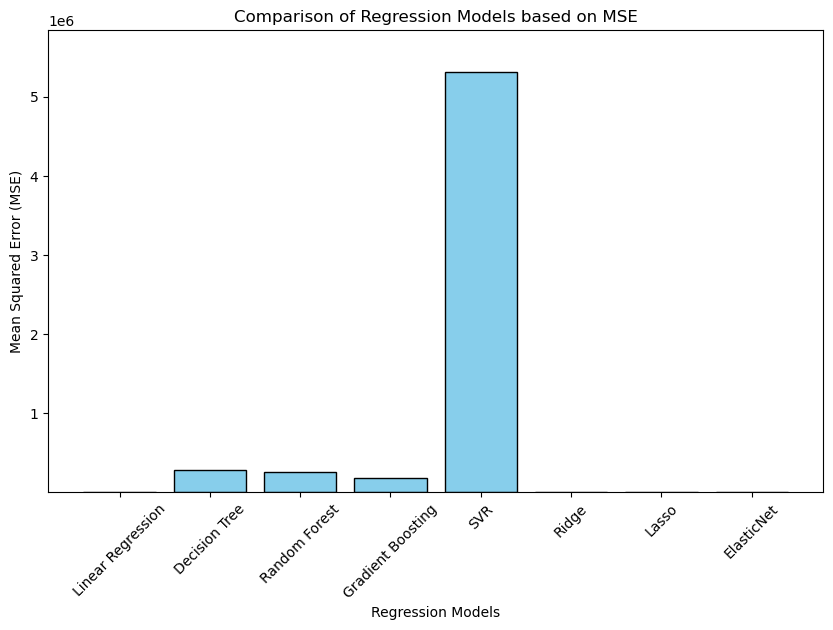

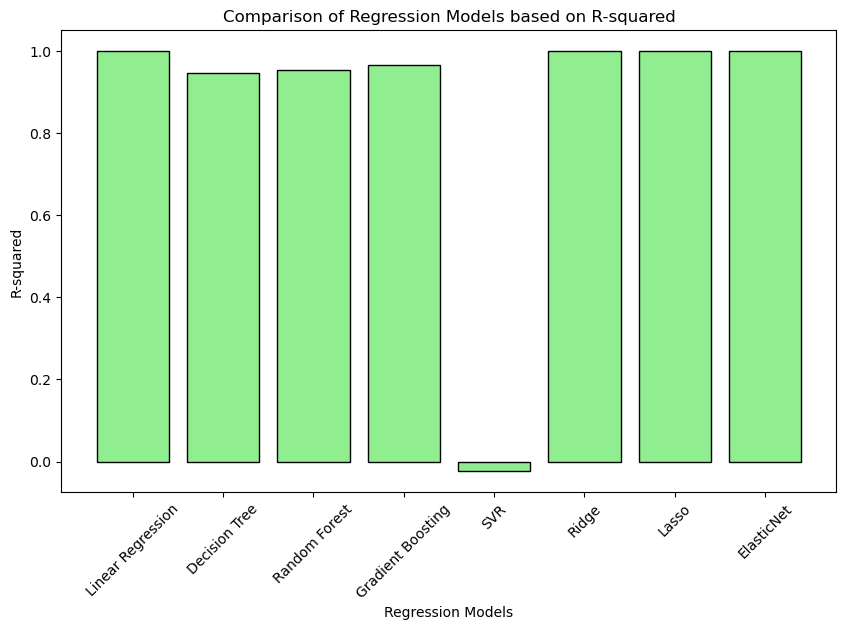

In [23]:
import matplotlib.pyplot as plt

# Model names for the bar chart
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR', 'Ridge', 'Lasso', 'ElasticNet']

# MSE and R-squared values for each model
mse_values = [mse_linear, mse_dt, mse_rf, mse_gradient_boosting, mse_svr, mse_ridge, mse_lasso, mse_elasticnet]
r2_values = [r2_linear, r2_dt, r2_rf, r2_gradient_boosting, r2_svr, r2_ridge, r2_lasso, r2_elasticnet]

# Plotting the bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='skyblue', edgecolor='black')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Regression Models based on MSE')

# Adjust y-axis limits to include negative R-squared value
plt.ylim(min(mse_values), max(mse_values) * 1.1) 

plt.xticks(rotation=45)
plt.show()

# Plotting the bar chart for R-squared
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='lightgreen', edgecolor='black')
plt.xlabel('Regression Models')
plt.ylabel('R-squared')
plt.title('Comparison of Regression Models based on R-squared')
plt.xticks(rotation=45)
plt.show()


### Assessing Predictive Performance

To evaluate and compare model performance, we employed Mean Squared Error (MSE) and R-squared metrics. The Gradient Boosting Regression model emerged as the most accurate, with the lowest MSE and the highest R-squared value, signifying its robust predictive power.


## Summary Report:

The dataset contains customer data related to credit card purchases. Missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS' were handled using mean and median imputation, respectively. Irrelevant columns were dropped.

During exploratory data analysis (EDA), we observed correlations between attributes, including a positive relationship between 'PURCHASES' and 'PAYMENTS.'

Multiple regression algorithms, including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, Ridge, Lasso, and ElasticNet, were evaluated. The results were:
* Linear Regression: Mean Squared Error (MSE) = 278.30, R-squared = 0.9999
* Decision Tree Regression: MSE = 280132.66, R-squared = 0.9461
* Random Forest Regression: MSE = 246346.22, R-squared = 0.9526
* Gradient Boosting Regression: MSE = 174699.85, R-squared = 0.9664
* Support Vector Regression (SVR): MSE = 5311323.44, R-squared = -0.0228
* Ridge Regression: MSE = 278.28, R-squared = 0.9999
* Lasso Regression: MSE = 278.09, R-squared = 0.9999
* ElasticNet Regression: MSE = 277.98, R-squared = 0.9999

The Gradient Boosting Regression model performed best, showing the lowest Mean Squared Error (MSE)  174699.85 and highest R-squared value 0.9664, making it suitable for predicting customer purchase with an accuracy of 97%.

## Conclusion and Practical Implications:
In conclusion, this analysis exemplifies the potential of regression modeling in predicting customer credit card purchases. The Gradient Boosting Regression model emerged as the star performer, demonstrating remarkable accuracy and robustness. Businesses can leverage this model to gain insights into customer behavior, enabling targeted marketing strategies and informed decision-making. The project underscores the significance of thorough data preprocessing, effective exploratory data analysis, and the power of advanced regression techniques in achieving predictive excellence